# World Data - Simple Analysis

In [184]:
# Library imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cufflinks as cf
import seaborn as sns
%matplotlib inline

In [2]:
# Read file and check heads and info
cols = ['video_id','title','channel_title','publish_time','trending_date','category_id','views','comment_count','likes','dislikes']
us_data = pd.read_csv('USvideos.csv',usecols=cols) # US Data
ca_data = pd.read_csv('CAvideos.csv',usecols=cols) # Canada Data
de_data = pd.read_csv('DEvideos.csv',usecols=cols) # Germany Data
gb_data = pd.read_csv('GBvideos.csv',usecols=cols) # Great Britain Data
in_data = pd.read_csv('INvideos.csv',usecols=cols) # India Data
jp_data = pd.read_csv('JPvideos.csv',usecols=cols) # Japan Data
kr_data = pd.read_csv('KRvideos.csv',usecols=cols) # South Korea Data
mx_data = pd.read_csv('MXvideos.csv',usecols=cols) # Mexico Data
ru_data = pd.read_csv('Ruvideos.csv',usecols=cols) # Russia Data

us_data['country'] = 'USA'
ca_data['country'] = "Canada"
de_data['country'] = "Germany"
gb_data['country'] = "UK"
in_data['country'] = 'India'
jp_data['country'] = 'Japan'
kr_data['country'] = "S. Korea"
mx_data['country'] = 'Mexico'
ru_data['country'] = 'Russia'

world_data = pd.concat([us_data,ca_data,de_data,gb_data,in_data,jp_data,kr_data,mx_data,ru_data])

In [3]:
world_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 335218 entries, 0 to 40738
Data columns (total 11 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   video_id       335218 non-null  object
 1   trending_date  335218 non-null  object
 2   title          335218 non-null  object
 3   channel_title  335218 non-null  object
 4   category_id    335218 non-null  int64 
 5   publish_time   335218 non-null  object
 6   views          335218 non-null  int64 
 7   likes          335218 non-null  int64 
 8   dislikes       335218 non-null  int64 
 9   comment_count  335218 non-null  int64 
 10  country        335218 non-null  object
dtypes: int64(5), object(6)
memory usage: 30.7+ MB


In [4]:
world_data.describe()

,category_id,views,likes,dislikes,comment_count
count,335218.000000,3.352180e+05,3.352180e+05,3.352180e+05,3.352180e+05
mean,20.245482,1.436712e+06,4.037420e+04,2.285392e+03,4.547930e+03
std,7.150081,7.484502e+06,1.723498e+05,2.347260e+04,2.649778e+04
min,1.000000,1.170000e+02,0.000000e+00,0.000000e+00,0.000000e+00
25%,17.000000,5.330425e+04,7.270000e+02,4.500000e+01,1.210000e+02
50%,23.000000,1.962455e+05,3.743500e+03,1.960000e+02,5.640000e+02
75%,24.000000,7.081985e+05,1.902200e+04,8.220000e+02,2.214000e+03
max,44.000000,4.245389e+08,5.613827e+06,1.944971e+06,1.626501e+06


In [5]:
world_data.head()

,video_id,trending_date,title,channel_title,category_id,publish_time,views,likes,dislikes,comment_count,country
0,2kyS6SvSYSE,17.14.11,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,22,2017-11-13T17:13:01.000Z,748374,57527,2966,15954,USA
1,1ZAPwfrtAFY,17.14.11,The Trump Presidency: Last Week Tonight with J...,LastWeekTonight,24,2017-11-13T07:30:00.000Z,2418783,97185,6146,12703,USA
2,5qpjK5DgCt4,17.14.11,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,2017-11-12T19:05:24.000Z,3191434,146033,5339,8181,USA
3,puqaWrEC7tY,17.14.11,Nickelback Lyrics: Real or Fake?,Good Mythical Morning,24,2017-11-13T11:00:04.000Z,343168,10172,666,2146,USA
4,d380meD0W0M,17.14.11,I Dare You: GOING BALD!?,nigahiga,24,2017-11-12T18:01:41.000Z,2095731,132235,1989,17518,USA


Check most and least viewed vidoes

In [6]:
world_data.nlargest(5,'views')[['title','channel_title','views']]

,title,channel_title,views
28412,Nicky Jam x J. Balvin - X (EQUIS) | Video Ofic...,NickyJamTV,424538912
28212,Nicky Jam x J. Balvin - X (EQUIS) | Video Ofic...,NickyJamTV,413586699
28008,Nicky Jam x J. Balvin - X (EQUIS) | Video Ofic...,NickyJamTV,402650804
27811,Nicky Jam x J. Balvin - X (EQUIS) | Video Ofic...,NickyJamTV,392036878
27615,Nicky Jam x J. Balvin - X (EQUIS) | Video Ofic...,NickyJamTV,382401497


In [7]:
world_data.nsmallest(5,'views')[['title','channel_title','views']]

,title,channel_title,views
14945,Навальный сдулся. Знали ли об этом его активис...,Нвлнй Хло 2.0,117
20314,Россия - Германия. Счет 4:3. Победа нашей сбор...,Alexander Redking,153
2561,RESUMEN CELAYA VS ALEBRIJES ASCENSO MX 2017,Ascenso MX,157
20345,РОССИЯ - ГЕРМАНИЯ ГОЛЫ И ЛУЧШИЕ МОМЕНТЫ,Sport Life,163
19764,Анисимов забил с паса Кейна,NHL.COM/RU,164


Check most and least liked videos

In [8]:
world_data.nlargest(5,'likes')[['title','channel_title','likes']]

,title,channel_title,likes
38273,BTS (방탄소년단) 'FAKE LOVE' Official MV,ibighit,5613827
36638,BTS (방탄소년단) 'FAKE LOVE' Official MV,ibighit,5613827
38072,BTS (방탄소년단) 'FAKE LOVE' Official MV,ibighit,5595203
36468,BTS (방탄소년단) 'FAKE LOVE' Official MV,ibighit,5595203
37861,BTS (방탄소년단) 'FAKE LOVE' Official MV,ibighit,5530568


In [9]:
world_data.nsmallest(5,'likes')[['title','channel_title','likes']]

,title,channel_title,likes
192,Apple Clips sample,Steve Kovach,0
1435,Breaking Bad's Bryan Cranston on Meeting Charl...,hudsonunionsociety,0
1490,Kelly Oubre Punches John Wall in the Lead duri...,Rob Andretti,0
1667,Breaking Bad's Bryan Cranston on Meeting Charl...,hudsonunionsociety,0
1741,Kelly Oubre Punches John Wall in the Lead duri...,Rob Andretti,0


Check most and least disliked videos

In [10]:
world_data.nlargest(5,'dislikes')[['title','channel_title','dislikes']]

,title,channel_title,dislikes
12784,So Sorry.,Logan Paul Vlogs,1944971
12559,So Sorry.,Logan Paul Vlogs,1928677
12343,So Sorry.,Logan Paul Vlogs,1911836
12134,So Sorry.,Logan Paul Vlogs,1890743
11928,So Sorry.,Logan Paul Vlogs,1868756


In [11]:
world_data.nsmallest(5,'dislikes')[['title','channel_title','dislikes']]

,title,channel_title,dislikes
147,Improvising in the style of different classica...,Nahre Sol,0
155,"The Oak Beams of New College, Oxford",Stewart Brand,0
160,Huffy Metaloid Bicycle Commercial 1997,90s Commercials,0
175,Sphaera - demonstrating interaction,Jenny Hanell,0
192,Apple Clips sample,Steve Kovach,0


Most and least commented-on videos

In [12]:
world_data.nlargest(5,'comment_count')[['title','channel_title','comment_count']]

,title,channel_title,comment_count
12784,So Sorry.,Logan Paul Vlogs,1626501
12559,So Sorry.,Logan Paul Vlogs,1606178
12343,So Sorry.,Logan Paul Vlogs,1588337
12134,So Sorry.,Logan Paul Vlogs,1562312
11928,So Sorry.,Logan Paul Vlogs,1534873


In [13]:
world_data.nsmallest(5,'comment_count')[['title','channel_title','comment_count']]

,title,channel_title,comment_count
31,Amazon Christmas Advert 2017 - Toys & Games,Amazon.co.uk,0
103,H&M Holiday 2017 starring Nicki Minaj – offici...,H&M,0
160,Huffy Metaloid Bicycle Commercial 1997,90s Commercials,0
192,Apple Clips sample,Steve Kovach,0
284,"Joel Embiid on win over Clippers, scuffle with...",NBA on ESPN,0


Check videos by the difference between likes and dislikes

In [14]:
world_data['likes-dislikes'] = world_data['likes']-world_data['dislikes']

In [15]:
world_data.nlargest(5,'likes-dislikes')[['title','views','likes-dislikes']]

,title,views,likes-dislikes
38273,BTS (방탄소년단) 'FAKE LOVE' Official MV,123010920,5406935
36638,BTS (방탄소년단) 'FAKE LOVE' Official MV,123010920,5406935
38072,BTS (방탄소년단) 'FAKE LOVE' Official MV,121219886,5389638
36468,BTS (방탄소년단) 'FAKE LOVE' Official MV,121219886,5389638
37861,BTS (방탄소년단) 'FAKE LOVE' Official MV,115664850,5329573


In [16]:
world_data.nsmallest(5,'likes-dislikes')[['title','views','likes-dislikes']]

,title,views,likes-dislikes
12784,So Sorry.,45349447,-372860
12559,So Sorry.,44815907,-369069
12343,So Sorry.,44266614,-364802
12134,So Sorry.,43596655,-358495
11928,So Sorry.,42829793,-352868


Analysis for specific period of time

In [17]:
def get_trend_year(text):
    text1 = text.split('.')
    year = text1[0]
    
    return year

def get_trend_month(text):
    text1 = text.split('.')
    month = text1[2]
    
    return month

def get_trend_day(text):
    text1 = text.split('.')
    day = text1[1]
    
    return day

In [18]:
world_data['trending_year'] = world_data['trending_date'].apply(get_trend_year)
world_data['trending_month'] = world_data['trending_date'].apply(get_trend_month)
world_data['trending_day'] = world_data['trending_date'].apply(get_trend_day)

In [19]:
def get_publish_year(date):
    date1 = date.split('-')
    year = date1[0]

    return year

def get_publish_month(date):
    date1 = date.split('-')
    month = date1[1]

    return month

def get_publish_day(date):
    date1 = date.split('-')
    date2 = date1[2].split('T')
    day = date2[0]

    return day

def get_publish_hour(date):
    date1 = date.split(':')
    date2 = date1[0].split('T')
    hour = date2[1]

    return hour

In [20]:
world_data['publish_year'] = world_data['publish_time'].apply(get_publish_year)
world_data['publish_month'] = world_data['publish_time'].apply(get_publish_month)
world_data['publish_day'] = world_data['publish_time'].apply(get_publish_day)
world_data['publish_hour'] = world_data['publish_time'].apply(get_publish_hour)

Most liked video in 2017

In [21]:
world_data[world_data['publish_year']=='2017'][['title','likes']].max()

title    🧀Сырный Наполеон - Я - ТОРТодел!
likes                             3312868
dtype: object

Most disliked video in 2018

In [22]:
world_data[world_data['publish_year']=='2018'][['title','dislikes']].max()

title       🧐8k Bitcoin rote Woche? Ethereum, Digibyte, Ve...
dislikes                                              1944971
dtype: object

Most Viewed Video in November 2017

In [23]:
world_data[(world_data['publish_year']=='2017') & (world_data['publish_month']=='11')][['title','views']].max()

title    🧀Сырный Наполеон - Я - ТОРТодел!
views                           143408235
dtype: object

Video with most comments in January 2018

In [24]:
world_data[(world_data['publish_year']=='2018') & (world_data['publish_month']=='01')][['title','comment_count']].max()

title            🤴🏻🤴🏼🤴🏿VOLVERA MI EX EN ENERO 2018?🤴🏻🤴🏼🤴🏿
comment_count                                     1626501
dtype: object

# Data Visualization

In [25]:
world_data01 = world_data.drop(['trending_date','title','channel_title','publish_time','likes-dislikes',
                                'trending_year','trending_month','trending_day','publish_year',
                              'publish_month','publish_day','publish_hour'],axis=1)

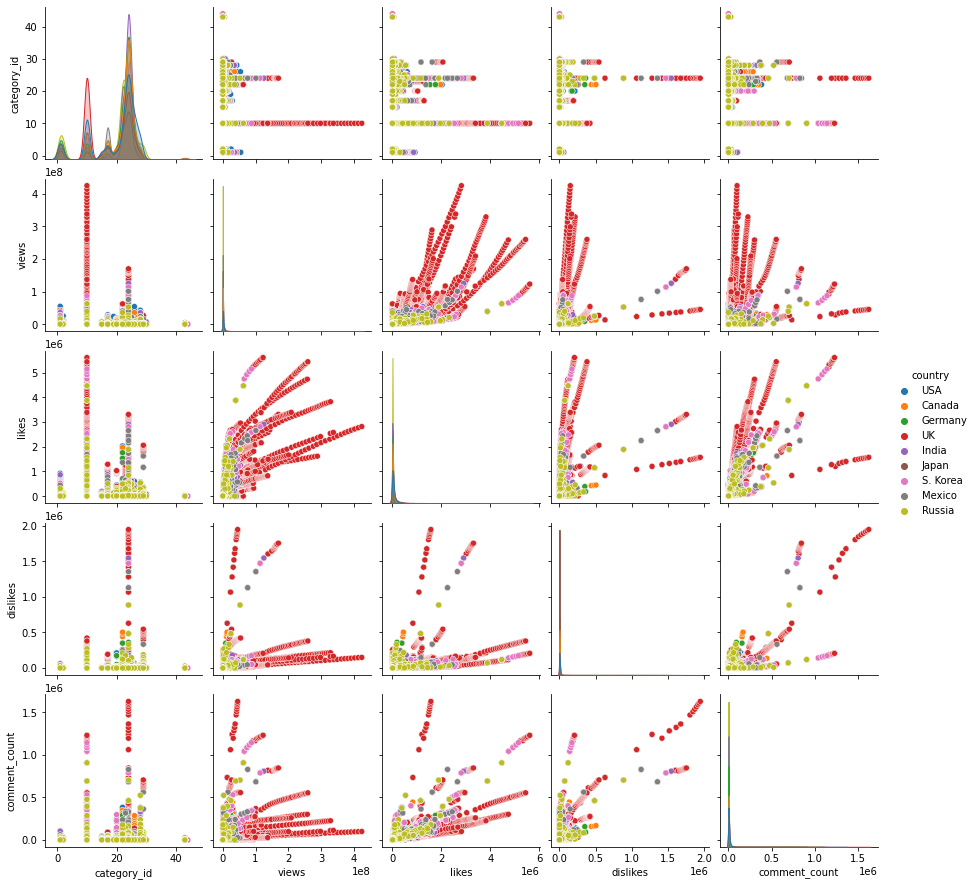

In [26]:
sns.pairplot(world_data01,hue='country')

<AxesSubplot:xlabel='views', ylabel='likes'>

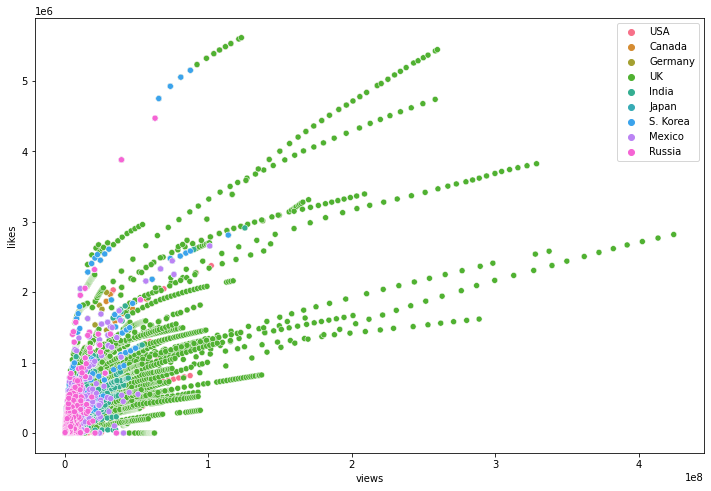

In [27]:
# Check views vs likes
plt.figure(figsize=(12,8))
sns.scatterplot(data=world_data,x='views',y='likes',hue=world_data.country.tolist(),palette='husl')

<AxesSubplot:xlabel='views', ylabel='dislikes'>

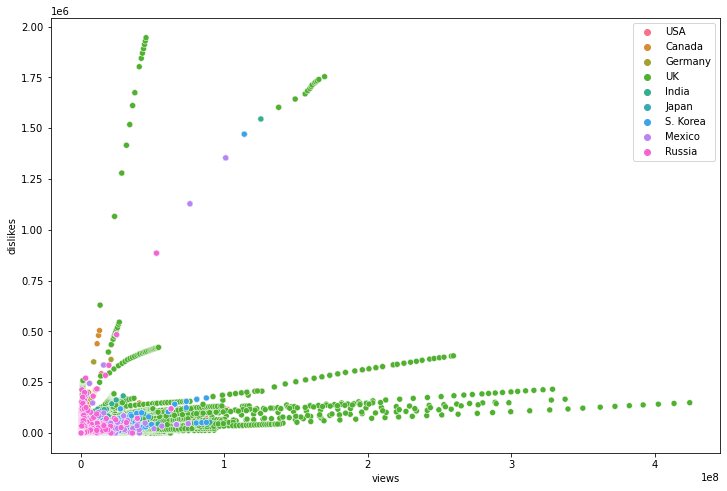

In [28]:
# Check views vs dislikes

plt.figure(figsize=(12,8))
sns.scatterplot(x='views',y='dislikes',data=world_data,hue=world_data.country.tolist(),palette='husl')

<AxesSubplot:xlabel='views', ylabel='comment_count'>

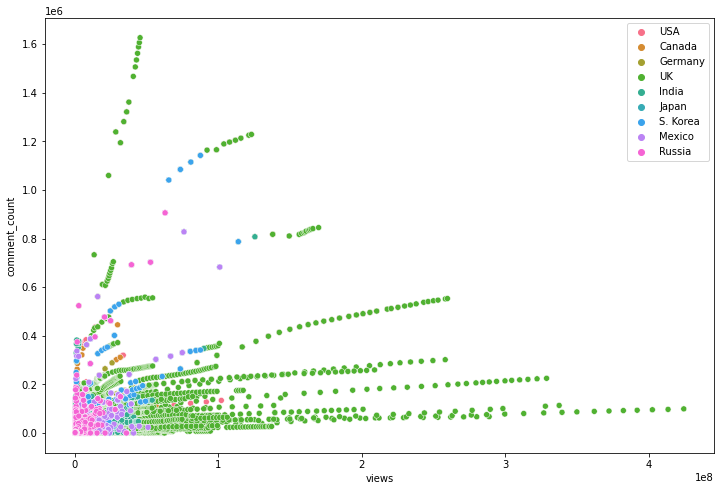

In [29]:
# Check views vs comment count
plt.figure(figsize=(12,8))
sns.scatterplot(x='views',y='comment_count',data=world_data,hue=world_data.country.tolist(),palette='husl')

<AxesSubplot:xlabel='likes', ylabel='comment_count'>

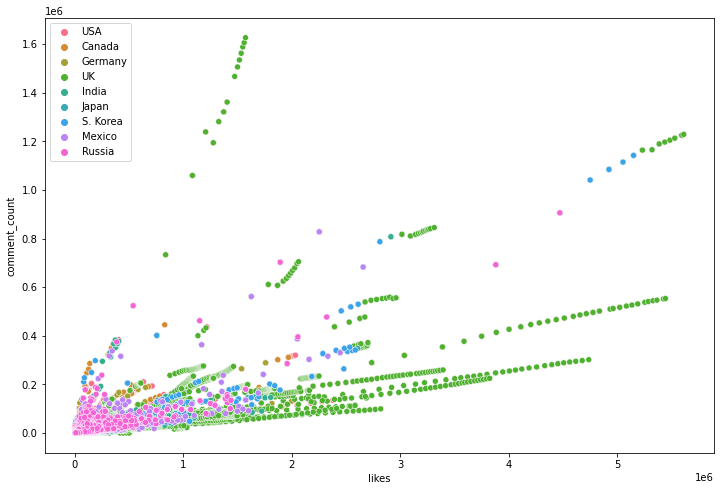

In [30]:
# Check likes vs comment count

plt.figure(figsize=(12,8))
sns.scatterplot(x='likes',y='comment_count',data=world_data,hue=world_data.country.tolist(),palette='husl')

<AxesSubplot:xlabel='dislikes', ylabel='comment_count'>

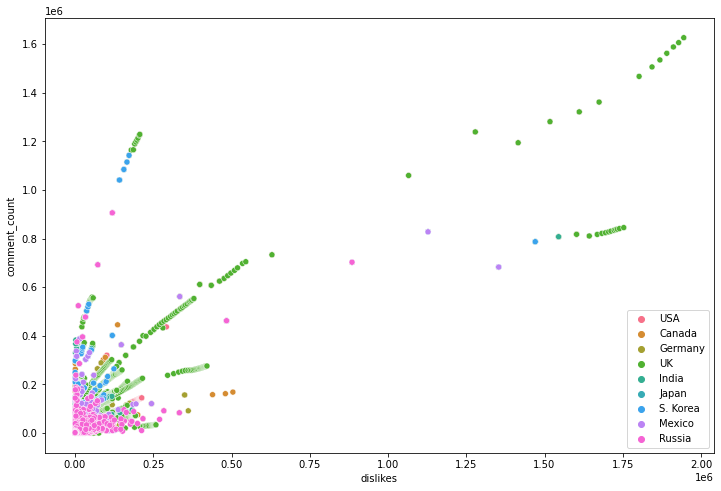

In [31]:
# check dislikes vs comment count

plt.figure(figsize=(12,8))
sns.scatterplot(x='dislikes',y='comment_count',data=world_data,hue=world_data.country.tolist(),palette='husl')

<AxesSubplot:xlabel='likes', ylabel='dislikes'>

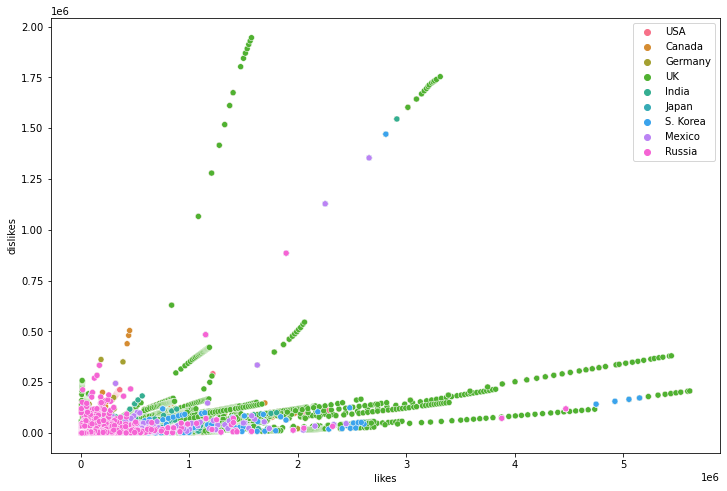

In [32]:
# Check likes vs dislikes

plt.figure(figsize=(12,8))
sns.scatterplot(x='likes',y='dislikes',data=world_data,hue=world_data.country.tolist(),palette='husl')

Correlation Matrix

<Figure size 864x576 with 0 Axes>

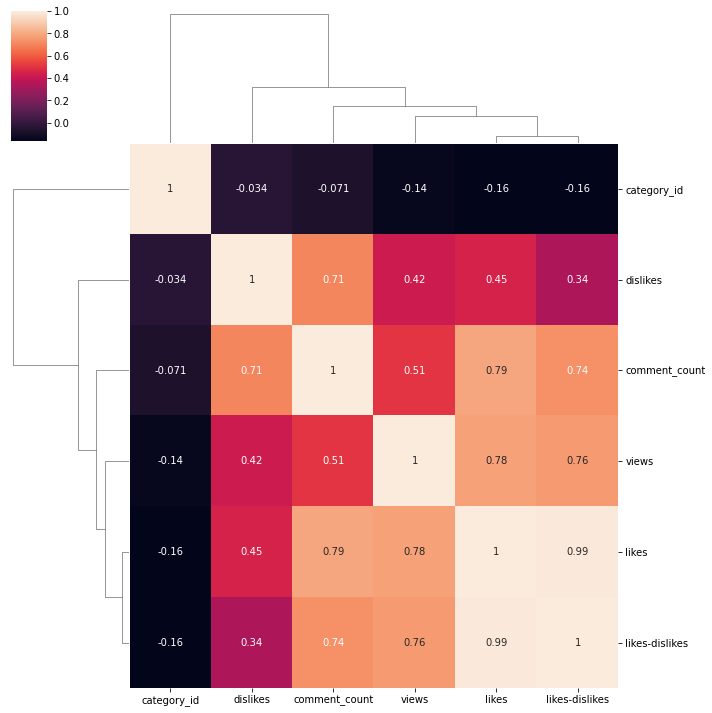

In [33]:
plt.figure(figsize=(12,8))
sns.clustermap(world_data.corr(),annot=True)

# Predict Number of Likes - Linear Regression

In [295]:
def year_id(year):
    if year == '2017':
        return 0
    elif year == '2018':
        return 1

def country_id(country):
    if country == 'USA':
        return 1
    elif country == 'Canada':
        return 2
    elif country == 'Germany':
        return 3
    elif country == 'UK':
        return 4
    elif country == 'India':
        return 5
    elif country == 'Japan':
        return 6
    elif country == 'S. Korea':
        return 7
    elif country == 'Mexico':
        return 8
    elif country == 'Russia':
        return 9

In [296]:
world_data['year code'] = world_data['publish_year'].apply(year_id)
world_data['country code'] = world_data['country'].apply(country_id)

In [297]:
world_data02 = world_data.drop(['video_id','trending_date','title','channel_title','publish_time',
                               'country','trending_year','trending_month','trending_day','publish_year'],axis=1)

In [298]:
world_data02.head()

,category_id,views,likes,dislikes,comment_count,likes-dislikes,publish_month,publish_day,publish_hour,year code,country code
0,22,748374,57527,2966,15954,54561,11,13,17,0.0,1
1,24,2418783,97185,6146,12703,91039,11,13,07,0.0,1
2,23,3191434,146033,5339,8181,140694,11,12,19,0.0,1
3,24,343168,10172,666,2146,9506,11,13,11,0.0,1
4,24,2095731,132235,1989,17518,130246,11,12,18,0.0,1


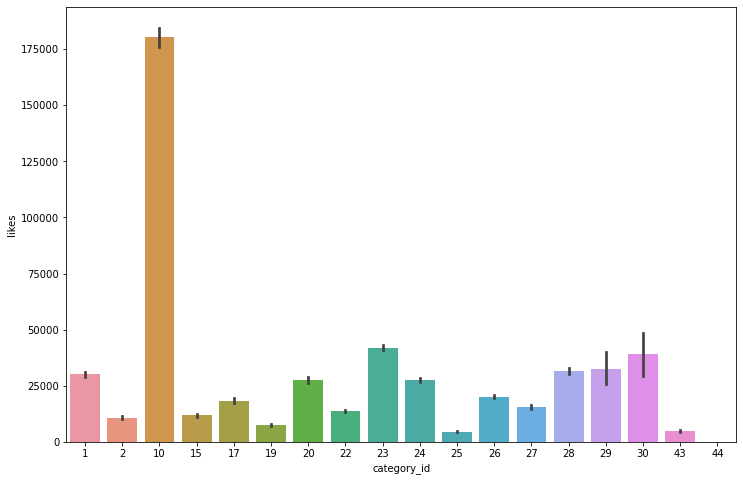

In [299]:
plt.figure(figsize=(12,8))
sns.barplot(x='category_id',y='likes',data=world_data02)
plt.title = "Likes Per Category"

<AxesSubplot:xlabel='category_id', ylabel='country code'>

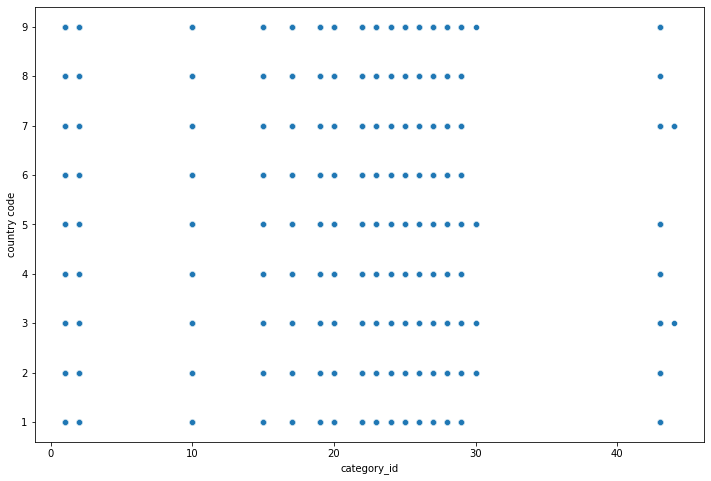

In [300]:
plt.figure(figsize=(12,8))
sns.scatterplot(x='category_id',y='country code',data=world_data,palette='husl')

In [301]:
world_data02['likes'] = np.log(world_data02['likes'])
world_data02['dislikes'] = np.log(world_data02['dislikes'])
world_data02['views'] = np.log(world_data02['views'])
world_data02['comment_count'] = np.log(world_data02['comment_count'])

/Users/fayezabu-ajamieh/anaconda3/lib/python3.7/site-packages/pandas/core/series.py:726: RuntimeWarning:

divide by zero encountered in log



In [302]:
world_data02['views'] = world_data02['views'].replace([np.inf,-np.inf],np.nan)
world_data02['likes'] = world_data02['likes'].replace([np.inf,-np.inf],np.nan)
world_data02['dislikes'] = world_data02['dislikes'].replace([np.inf,-np.inf],np.nan)
world_data02['comment_count'] = world_data02['comment_count'].replace([np.inf,-np.inf],np.nan)

In [303]:
world_data02 = world_data02.dropna()

In [304]:
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.linear_model import LinearRegression

In [305]:
X = world_data02.drop('likes',axis=1)
y = world_data02['likes']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)
l_reg = LinearRegression()

In [306]:
l_reg.fit(X_train,y_train)

LinearRegression()

In [307]:
coeff = pd.DataFrame(l_reg.coef_,X.columns,columns=['Coefficients'])

In [308]:
coeff

,Coefficients
category_id,-1.173586e-02
views,3.688798e-01
dislikes,2.099430e-02
comment_count,6.401877e-01
likes-dislikes,5.221529e-07
publish_month,3.968733e-03
publish_day,-2.162577e-04
publish_hour,8.165803e-03
year code,-4.788119e-03
country code,-9.799478e-03


In [309]:
predictions = l_reg.predict(X_test)

Evaluate Model

Text(0, 0.5, 'Actual')

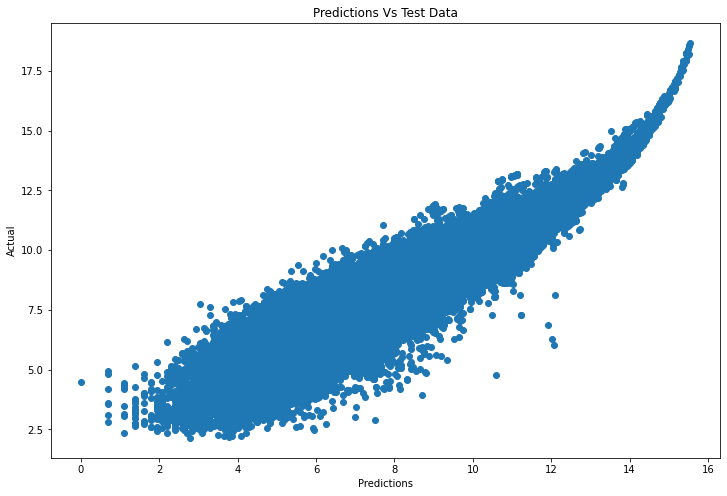

In [310]:
fig,ax=plt.subplots(figsize=(12,8))
plt.scatter(y_test,predictions)
ax.set_title("Predictions Vs Test Data")
ax.set_xlabel('Predictions')
ax.set_ylabel('Actual')

/Users/fayezabu-ajamieh/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:2551: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



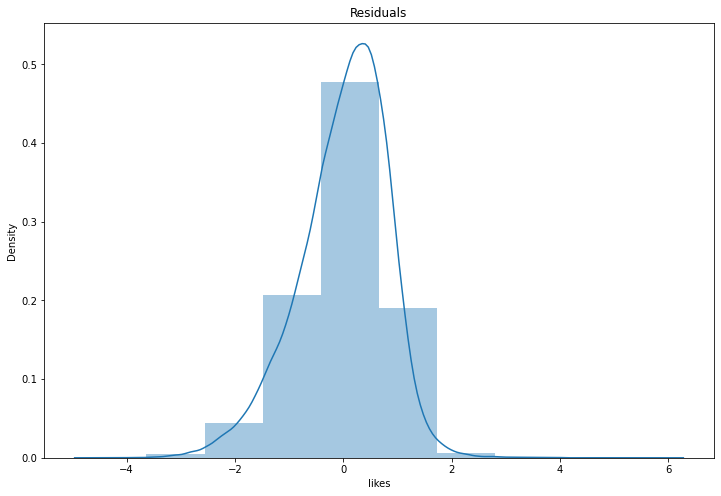

In [311]:
fig,ax=plt.subplots(figsize=(12,8))
ax.set_title("Residuals")
sns.distplot((y_test-predictions),bins=10);

In [312]:
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 0.6512685029082134
MSE: 0.6890145100739965
RMSE: 0.8300689791059515


# Clustering Data Accoring to Country

In [313]:
# We would like to be able to predict the country based on the data

In [456]:
world_data03 = world_data.drop(['category_id','video_id','trending_date','title','channel_title','publish_time',
                               'trending_year','trending_month','trending_day','publish_year','country',
                                'publish_month','publish_day','publish_hour','year code','likes-dislikes'],axis=1)

In [329]:
world_data03.head()

,views,likes,dislikes,comment_count,country code
0,748374,57527,2966,15954,1
1,2418783,97185,6146,12703,1
2,3191434,146033,5339,8181,1
3,343168,10172,666,2146,1
4,2095731,132235,1989,17518,1


In [330]:
world_data03['views'] = world_data03['views'].replace([np.inf,-np.inf],np.nan)
world_data03['likes'] = world_data03['likes'].replace([np.inf,-np.inf],np.nan)
world_data03['dislikes'] = world_data03['dislikes'].replace([np.inf,-np.inf],np.nan)
world_data03['comment_count'] = world_data03['comment_count'].replace([np.inf,-np.inf],np.nan)

world_data03 = world_data03.dropna()

K Nearest Neighbors Method

In [331]:
# Begin by scaling data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [332]:
scaler.fit(world_data03.drop('country code',axis=1))

StandardScaler()

In [335]:
scaled_features = scaler.transform(world_data03.drop('country code',axis=1))

In [336]:
world_data03_feat = pd.DataFrame(scaled_features,columns=world_data04.columns[:-1])

In [337]:
world_data03_feat.head()

,views,likes,dislikes,comment_count
0,-0.091969,0.099523,0.028996,0.430454
1,0.131214,0.329626,0.164473,0.307765
2,0.234448,0.613050,0.130093,0.137109
3,-0.146108,-0.175238,-0.068991,-0.090647
4,0.088051,0.532991,-0.012627,0.489478


In [339]:
# Import train_test_split and split data
from sklearn.model_selection import train_test_split
X = world_data03.drop(['country code'],axis=1)
y = world_data03['country code']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [340]:
# Import K nearest neigbors, fit data and evaluate performance for several values of K

In [341]:
from sklearn.neighbors import KNeighborsClassifier

error_rate = []

for i in range(1,100):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    knn_pred_i = knn.predict(X_test)
    error_rate.append(np.mean(knn_pred_i != y_test))

TypeError: 'str' object is not callable

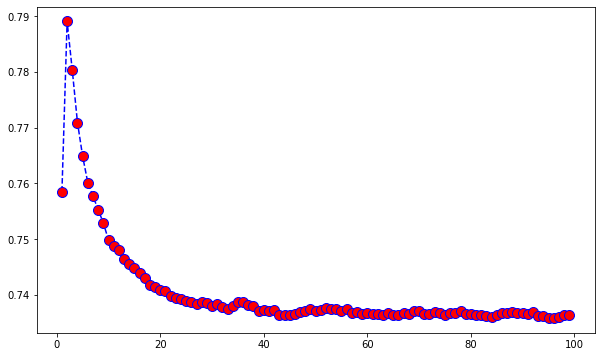

In [342]:
plt.figure(figsize=(10,6))

plt.plot(range(1,100),error_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)

plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

In [343]:
# Set K = 43
# Evaluate Classification report and confusion matrix
knn = KNeighborsClassifier(n_neighbors=43)
knn.fit(X_train,y_train)
knn_pred = knn.predict(X_test)

In [344]:
from sklearn.metrics import classification_report,confusion_matrix

print(confusion_matrix(y_test,knn_pred))
print('\n')
print(classification_report(y_test,knn_pred))

[[4559 1542  550 2478 1033  170  670  581  549]
 [3351 1975  686 1325 1858  203 1333  776  683]
 [1748 1220 1599  741 1536  458 1222 2113 1662]
 [3423 1259  487 3863  910  126  684  444  519]
 [1892  966  533 1008 4338  191 1078  700  518]
 [ 344  362  660  178 1086  728 1104 1219  456]
 [ 726  943  646  360 2405  419 2830 1250  834]
 [ 989  765 1119  419 1491  616 1188 3646 1923]
 [1008  907 1331  360  903  540 1501 2768 2982]]


              precision    recall  f1-score   support

           1       0.25      0.38      0.30     12132
           2       0.20      0.16      0.18     12190
           3       0.21      0.13      0.16     12299
           4       0.36      0.33      0.34     11715
           5       0.28      0.39      0.32     11224
           6       0.21      0.12      0.15      6137
           7       0.24      0.27      0.26     10413
           8       0.27      0.30      0.28     12156
           9       0.29      0.24      0.27     12300

    accuracy           

In [345]:
# KNN performs poorly

Logistic Regression

In [346]:
from sklearn.linear_model import LogisticRegression
log_r = LogisticRegression()

In [347]:
log_r.fit(X_train,y_train)

/Users/fayezabu-ajamieh/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



LogisticRegression()

In [348]:
log_r_pred = log_r.predict(X_test)

In [349]:
print(confusion_matrix(y_test,log_r_pred))
print('\n')
print(classification_report(y_test,log_r_pred))

/Users/fayezabu-ajamieh/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



[[ 1002     1     0 11095     5     0     0    29     0]
 [ 1372     8     0 10761     2     0     0    46     1]
 [ 2259    21     0  9894     3     0     0   121     1]
 [  982     6     0 10668    10     0     0    49     0]
 [  743     1     0 10450     0     0     0    26     4]
 [  247     2     0  5867     2     0     0    18     1]
 [  519     6     0  9859     0     0     0    29     0]
 [ 3048     9     0  8705     0     0     0   371    23]
 [ 3396   107    19  8494     8     0     0   234    42]]


              precision    recall  f1-score   support

           1       0.07      0.08      0.08     12132
           2       0.05      0.00      0.00     12190
           3       0.00      0.00      0.00     12299
           4       0.12      0.91      0.22     11715
           5       0.00      0.00      0.00     11224
           6       0.00      0.00      0.00      6137
           7       0.00      0.00      0.00     10413
           8       0.40      0.03      0.06     121

In [ ]:
# Logistic regression performs poorly

# Classification Based on Country Using a Neural Network

In [516]:
# We want to classify the based on whether the country is USA or not
def country_id2(country):
    
    if country == 1:
        return 1
    else:
        return 0

In [519]:
world_data03['country code'] = world_data03['country code'].apply(country_id2)

In [521]:
world_data03.tail()

,views,likes,dislikes,comment_count,country code
40734,129488,5893,164,990,0
40735,99163,4659,337,692,0
40736,449611,24808,93,974,0
40737,14225,793,39,209,0
40738,52340,7708,133,1819,0


In [522]:
# Import train_test_split and split data
from sklearn.model_selection import train_test_split
X = world_data03.drop(['country code'],axis=1)
y = world_data03['country code']

X = np.asarray(X).astype('float32')
y = np.asarray(y).astype('float32')

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [523]:
# Scale Data
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [538]:
# Create model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.optimizers import Adam

model = Sequential()

model.add(Dense(units=30,activation='relu'))
model.add(Dense(units=15,activation='relu'))

model.add(Dense(units=1,activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam')

In [539]:
# Train model

model.fit(x=X_train,y=y_train,
          validation_data=(X_test,y_test),
          batch_size=128,epochs=1000, verbose=1)

Train on 234652 samples, validate on 100566 samples
Epoch 1/1000
234652/234652 [==============================] - 8s 33us/sample - loss: 0.3776 - val_loss: 0.3575
Epoch 2/1000
234652/234652 [==============================] - 7s 31us/sample - loss: 0.3552 - val_loss: 0.3463
Epoch 3/1000
234652/234652 [==============================] - 7s 32us/sample - loss: 0.3472 - val_loss: 0.3407
Epoch 4/1000
234652/234652 [==============================] - 8s 32us/sample - loss: 0.3436 - val_loss: 0.3386
Epoch 5/1000
234652/234652 [==============================] - 8s 32us/sample - loss: 0.3420 - val_loss: 0.3371
Epoch 6/1000
234652/234652 [==============================] - 7s 30us/sample - loss: 0.3412 - val_loss: 0.3366
Epoch 7/1000
234652/234652 [==============================] - 7s 29us/sample - loss: 0.3409 - val_loss: 0.3371
Epoch 8/1000
234652/234652 [==============================] - 7s 29us/sample - loss: 0.3406 - val_loss: 0.3379
Epoch 9/1000
234652/234652 [==============================] 

Epoch 74/1000
234652/234652 [==============================] - 6s 27us/sample - loss: 0.3326 - val_loss: 0.3294
Epoch 75/1000
234652/234652 [==============================] - 6s 27us/sample - loss: 0.3327 - val_loss: 0.3277
Epoch 76/1000
234652/234652 [==============================] - 6s 27us/sample - loss: 0.3324 - val_loss: 0.3276
Epoch 77/1000
234652/234652 [==============================] - 6s 27us/sample - loss: 0.3323 - val_loss: 0.3290
Epoch 78/1000
234652/234652 [==============================] - 6s 27us/sample - loss: 0.3321 - val_loss: 0.3287
Epoch 79/1000
234652/234652 [==============================] - 6s 27us/sample - loss: 0.3324 - val_loss: 0.3289
Epoch 80/1000
234652/234652 [==============================] - 6s 28us/sample - loss: 0.3320 - val_loss: 0.3280
Epoch 81/1000
234652/234652 [==============================] - 7s 28us/sample - loss: 0.3320 - val_loss: 0.3289
Epoch 82/1000
234652/234652 [==============================] - 7s 29us/sample - loss: 0.3319 - val_loss:

234652/234652 [==============================] - 11s 46us/sample - loss: 0.3292 - val_loss: 0.3263
Epoch 147/1000
234652/234652 [==============================] - 11s 47us/sample - loss: 0.3294 - val_loss: 0.3255
Epoch 148/1000
234652/234652 [==============================] - 11s 46us/sample - loss: 0.3293 - val_loss: 0.3273
Epoch 149/1000
234652/234652 [==============================] - 11s 47us/sample - loss: 0.3292 - val_loss: 0.3254
Epoch 150/1000
234652/234652 [==============================] - 11s 46us/sample - loss: 0.3294 - val_loss: 0.3264
Epoch 151/1000
234652/234652 [==============================] - 11s 46us/sample - loss: 0.3293 - val_loss: 0.3249
Epoch 152/1000
234652/234652 [==============================] - 11s 47us/sample - loss: 0.3292 - val_loss: 0.3243
Epoch 153/1000
234652/234652 [==============================] - 11s 45us/sample - loss: 0.3290 - val_loss: 0.3241
Epoch 154/1000
234652/234652 [==============================] - 11s 46us/sample - loss: 0.3290 - val_lo

Epoch 218/1000
234652/234652 [==============================] - 11s 48us/sample - loss: 0.3275 - val_loss: 0.3261
Epoch 219/1000
234652/234652 [==============================] - 10s 44us/sample - loss: 0.3276 - val_loss: 0.3237
Epoch 220/1000
234652/234652 [==============================] - 11s 46us/sample - loss: 0.3274 - val_loss: 0.3249
Epoch 221/1000
234652/234652 [==============================] - 11s 46us/sample - loss: 0.3276 - val_loss: 0.3234
Epoch 222/1000
234652/234652 [==============================] - 11s 49us/sample - loss: 0.3274 - val_loss: 0.3238
Epoch 223/1000
234652/234652 [==============================] - 12s 50us/sample - loss: 0.3276 - val_loss: 0.3236
Epoch 224/1000
234652/234652 [==============================] - 11s 47us/sample - loss: 0.3274 - val_loss: 0.3222
Epoch 225/1000
234652/234652 [==============================] - 11s 47us/sample - loss: 0.3275 - val_loss: 0.3244
Epoch 226/1000
234652/234652 [==============================] - 11s 47us/sample - loss: 

Epoch 290/1000
234652/234652 [==============================] - 11s 48us/sample - loss: 0.3266 - val_loss: 0.3226
Epoch 291/1000
234652/234652 [==============================] - 11s 48us/sample - loss: 0.3263 - val_loss: 0.3218
Epoch 292/1000
234652/234652 [==============================] - 11s 48us/sample - loss: 0.3263 - val_loss: 0.3222
Epoch 293/1000
234652/234652 [==============================] - 11s 49us/sample - loss: 0.3264 - val_loss: 0.3232
Epoch 294/1000
234652/234652 [==============================] - 11s 48us/sample - loss: 0.3261 - val_loss: 0.3217
Epoch 295/1000
234652/234652 [==============================] - 12s 49us/sample - loss: 0.3264 - val_loss: 0.3215
Epoch 296/1000
234652/234652 [==============================] - 12s 49us/sample - loss: 0.3265 - val_loss: 0.3224
Epoch 297/1000
234652/234652 [==============================] - 12s 50us/sample - loss: 0.3262 - val_loss: 0.3219
Epoch 298/1000
234652/234652 [==============================] - 12s 52us/sample - loss: 

234652/234652 [==============================] - 6s 27us/sample - loss: 0.3254 - val_loss: 0.3213
Epoch 363/1000
234652/234652 [==============================] - 6s 27us/sample - loss: 0.3257 - val_loss: 0.3235
Epoch 364/1000
234652/234652 [==============================] - 6s 27us/sample - loss: 0.3256 - val_loss: 0.3222
Epoch 365/1000
234652/234652 [==============================] - 6s 27us/sample - loss: 0.3255 - val_loss: 0.3222
Epoch 366/1000
234652/234652 [==============================] - 6s 27us/sample - loss: 0.3255 - val_loss: 0.3235
Epoch 367/1000
234652/234652 [==============================] - 6s 27us/sample - loss: 0.3255 - val_loss: 0.3219
Epoch 368/1000
234652/234652 [==============================] - 6s 27us/sample - loss: 0.3255 - val_loss: 0.3221
Epoch 369/1000
234652/234652 [==============================] - 6s 27us/sample - loss: 0.3255 - val_loss: 0.3226
Epoch 370/1000
234652/234652 [==============================] - 6s 27us/sample - loss: 0.3256 - val_loss: 0.321

234652/234652 [==============================] - 8s 33us/sample - loss: 0.3251 - val_loss: 0.3214
Epoch 435/1000
234652/234652 [==============================] - 8s 33us/sample - loss: 0.3252 - val_loss: 0.3199
Epoch 436/1000
234652/234652 [==============================] - 7s 31us/sample - loss: 0.3250 - val_loss: 0.3232
Epoch 437/1000
234652/234652 [==============================] - 7s 31us/sample - loss: 0.3249 - val_loss: 0.3211
Epoch 438/1000
234652/234652 [==============================] - 7s 31us/sample - loss: 0.3250 - val_loss: 0.3231
Epoch 439/1000
234652/234652 [==============================] - 7s 30us/sample - loss: 0.3253 - val_loss: 0.3207
Epoch 440/1000
234652/234652 [==============================] - 7s 30us/sample - loss: 0.3252 - val_loss: 0.3210
Epoch 441/1000
234652/234652 [==============================] - 7s 29us/sample - loss: 0.3251 - val_loss: 0.3199
Epoch 442/1000
234652/234652 [==============================] - 7s 31us/sample - loss: 0.3250 - val_loss: 0.322

234652/234652 [==============================] - 7s 30us/sample - loss: 0.3247 - val_loss: 0.3196
Epoch 507/1000
234652/234652 [==============================] - 7s 30us/sample - loss: 0.3248 - val_loss: 0.3200
Epoch 508/1000
234652/234652 [==============================] - 7s 30us/sample - loss: 0.3245 - val_loss: 0.3228
Epoch 509/1000
234652/234652 [==============================] - 7s 29us/sample - loss: 0.3245 - val_loss: 0.3238
Epoch 510/1000
234652/234652 [==============================] - 7s 29us/sample - loss: 0.3246 - val_loss: 0.3213
Epoch 511/1000
234652/234652 [==============================] - 7s 29us/sample - loss: 0.3246 - val_loss: 0.3211
Epoch 512/1000
234652/234652 [==============================] - 8s 32us/sample - loss: 0.3245 - val_loss: 0.3194
Epoch 513/1000
234652/234652 [==============================] - 7s 30us/sample - loss: 0.3246 - val_loss: 0.3210
Epoch 514/1000
234652/234652 [==============================] - 8s 33us/sample - loss: 0.3245 - val_loss: 0.320

234652/234652 [==============================] - 7s 30us/sample - loss: 0.3242 - val_loss: 0.3201
Epoch 579/1000
234652/234652 [==============================] - 7s 30us/sample - loss: 0.3242 - val_loss: 0.3214
Epoch 580/1000
234652/234652 [==============================] - 7s 30us/sample - loss: 0.3243 - val_loss: 0.3203
Epoch 581/1000
234652/234652 [==============================] - 8s 33us/sample - loss: 0.3242 - val_loss: 0.3193
Epoch 582/1000
234652/234652 [==============================] - 7s 30us/sample - loss: 0.3242 - val_loss: 0.3215
Epoch 583/1000
234652/234652 [==============================] - 7s 29us/sample - loss: 0.3242 - val_loss: 0.3199
Epoch 584/1000
234652/234652 [==============================] - 7s 28us/sample - loss: 0.3242 - val_loss: 0.3210
Epoch 585/1000
234652/234652 [==============================] - 7s 28us/sample - loss: 0.3241 - val_loss: 0.3194
Epoch 586/1000
234652/234652 [==============================] - 7s 29us/sample - loss: 0.3240 - val_loss: 0.320

234652/234652 [==============================] - 10s 44us/sample - loss: 0.3239 - val_loss: 0.3199
Epoch 651/1000
234652/234652 [==============================] - 10s 44us/sample - loss: 0.3237 - val_loss: 0.3193
Epoch 652/1000
234652/234652 [==============================] - 10s 44us/sample - loss: 0.3236 - val_loss: 0.3194
Epoch 653/1000
234652/234652 [==============================] - 10s 44us/sample - loss: 0.3237 - val_loss: 0.3207
Epoch 654/1000
234652/234652 [==============================] - 10s 44us/sample - loss: 0.3237 - val_loss: 0.3212
Epoch 655/1000
234652/234652 [==============================] - 10s 45us/sample - loss: 0.3237 - val_loss: 0.3197
Epoch 656/1000
234652/234652 [==============================] - 10s 44us/sample - loss: 0.3237 - val_loss: 0.3229
Epoch 657/1000
234652/234652 [==============================] - 10s 44us/sample - loss: 0.3239 - val_loss: 0.3202
Epoch 658/1000
234652/234652 [==============================] - 10s 44us/sample - loss: 0.3239 - val_lo

234652/234652 [==============================] - 7s 28us/sample - loss: 0.3234 - val_loss: 0.3193
Epoch 723/1000
234652/234652 [==============================] - 7s 28us/sample - loss: 0.3234 - val_loss: 0.3199
Epoch 724/1000
234652/234652 [==============================] - 7s 29us/sample - loss: 0.3233 - val_loss: 0.3202
Epoch 725/1000
234652/234652 [==============================] - 7s 28us/sample - loss: 0.3233 - val_loss: 0.3196
Epoch 726/1000
234652/234652 [==============================] - 7s 28us/sample - loss: 0.3233 - val_loss: 0.3203
Epoch 727/1000
234652/234652 [==============================] - 7s 29us/sample - loss: 0.3235 - val_loss: 0.3197
Epoch 728/1000
234652/234652 [==============================] - 7s 28us/sample - loss: 0.3233 - val_loss: 0.3202
Epoch 729/1000
234652/234652 [==============================] - 7s 28us/sample - loss: 0.3233 - val_loss: 0.3195
Epoch 730/1000
234652/234652 [==============================] - 7s 28us/sample - loss: 0.3234 - val_loss: 0.320

234652/234652 [==============================] - 6s 27us/sample - loss: 0.3229 - val_loss: 0.3218
Epoch 795/1000
234652/234652 [==============================] - 6s 27us/sample - loss: 0.3228 - val_loss: 0.3205
Epoch 796/1000
234652/234652 [==============================] - 7s 28us/sample - loss: 0.3229 - val_loss: 0.3197
Epoch 797/1000
234652/234652 [==============================] - 6s 28us/sample - loss: 0.3230 - val_loss: 0.3187
Epoch 798/1000
234652/234652 [==============================] - 6s 28us/sample - loss: 0.3229 - val_loss: 0.3191
Epoch 799/1000
234652/234652 [==============================] - 6s 27us/sample - loss: 0.3228 - val_loss: 0.3193
Epoch 800/1000
234652/234652 [==============================] - 6s 27us/sample - loss: 0.3229 - val_loss: 0.3186
Epoch 801/1000
234652/234652 [==============================] - 6s 27us/sample - loss: 0.3226 - val_loss: 0.3191
Epoch 802/1000
234652/234652 [==============================] - 6s 28us/sample - loss: 0.3229 - val_loss: 0.322

234652/234652 [==============================] - 7s 29us/sample - loss: 0.3227 - val_loss: 0.3201
Epoch 867/1000
234652/234652 [==============================] - 7s 29us/sample - loss: 0.3226 - val_loss: 0.3190
Epoch 868/1000
234652/234652 [==============================] - 7s 29us/sample - loss: 0.3225 - val_loss: 0.3188
Epoch 869/1000
234652/234652 [==============================] - 7s 29us/sample - loss: 0.3227 - val_loss: 0.3202
Epoch 870/1000
234652/234652 [==============================] - 7s 30us/sample - loss: 0.3226 - val_loss: 0.3185
Epoch 871/1000
234652/234652 [==============================] - 7s 28us/sample - loss: 0.3226 - val_loss: 0.3198
Epoch 872/1000
234652/234652 [==============================] - 7s 29us/sample - loss: 0.3226 - val_loss: 0.3183
Epoch 873/1000
234652/234652 [==============================] - 7s 29us/sample - loss: 0.3225 - val_loss: 0.3191
Epoch 874/1000
234652/234652 [==============================] - 7s 29us/sample - loss: 0.3227 - val_loss: 0.319

234652/234652 [==============================] - 8s 32us/sample - loss: 0.3223 - val_loss: 0.3197
Epoch 939/1000
234652/234652 [==============================] - 7s 32us/sample - loss: 0.3223 - val_loss: 0.3199
Epoch 940/1000
234652/234652 [==============================] - 8s 34us/sample - loss: 0.3223 - val_loss: 0.3193
Epoch 941/1000
234652/234652 [==============================] - 7s 30us/sample - loss: 0.3224 - val_loss: 0.3188
Epoch 942/1000
234652/234652 [==============================] - 7s 31us/sample - loss: 0.3223 - val_loss: 0.3183
Epoch 943/1000
234652/234652 [==============================] - 8s 32us/sample - loss: 0.3223 - val_loss: 0.3200
Epoch 944/1000
234652/234652 [==============================] - 7s 31us/sample - loss: 0.3223 - val_loss: 0.3183
Epoch 945/1000
234652/234652 [==============================] - 7s 31us/sample - loss: 0.3223 - val_loss: 0.3188
Epoch 946/1000
234652/234652 [==============================] - 7s 31us/sample - loss: 0.3225 - val_loss: 0.319

<AxesSubplot:>

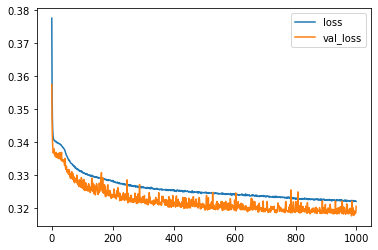

In [540]:
model_loss = pd.DataFrame(model.history.history)
model_loss.plot()

In [541]:
# Predictions
predictions = model.predict_classes(X_test)

In [542]:
from sklearn.metrics import classification_report, confusion_matrix

In [543]:
print(classification_report(y_test, predictions))
print('\n')
print(confusion_matrix(y_test, predictions))

              precision    recall  f1-score   support

         0.0       0.88      1.00      0.94     88434
         1.0       0.57      0.01      0.02     12132

    accuracy                           0.88    100566
   macro avg       0.72      0.50      0.48    100566
weighted avg       0.84      0.88      0.83    100566



[[88334   100]
 [12000   132]]
